In [68]:
import pandas as pd
import numpy as np
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

Use pandas pd.read_csv method to read in WA_Fn-UseC_-Telco-Customer-Churn.csv data and call it data

In [69]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv').dropna()

*We use the dataframe.head() function to take a look at the first 5 rows of our data.

In [70]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Use the df.describe(), df.info() and df.isnull().sum() functions to further assess our data.

In [71]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

* Use the df.isnull().sum() function to get the number of null values in each of the columns should any exist

In [73]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* Drop customerID and Totalcharges columns.

In [74]:
data1 = data.drop(['customerID'], axis=1)

In [75]:
data2 = data1.drop(['TotalCharges'], axis=1)

From the df.head() function that we used earlier, we were able to determine that the dataframe contains a mixture of categorical and numercal data. This means that we have to change this so we can plot it. Below we use the df.column.replace() function to change the categorical data to numeric.

In [76]:
# Use df.replace()function on the column to change the variable to an interger.
data2['Partner'].replace(['Yes','No'], [1,0],inplace=True)

In [77]:
# Use df.replace()function on the  column to change the variable to an interger.
data2['gender'].replace(['Male','Female'], [0,1],inplace=True)

In [78]:
# Use df.replace()function on the  column to change the variable to an interger.
data2['InternetService'].replace(['No','DSL','Fiber optic'], [0,1,2],inplace=True)

In [79]:
# Use df.replace()function on the column to change the variable to an interger.
data2['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [80]:
# Use df.replace()function on the column to change the variable to an interger.
data2['PhoneService'].replace(['Yes','No'], [1,0],inplace=True)

In [81]:
# Use df.replace()function on the to change the variable to an interger.
data2['Dependents'].replace(['Yes','No'], [1,0],inplace=True)

In [82]:
# Use df.replace()function on the column to change the variable to an interger.
data2['DeviceProtection'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [83]:
# Use df.replace()function on the column to change the variable to an interger.
data2['MultipleLines'].replace(['No phone service','No', 'Yes'], [0,0,1],inplace=True)

In [84]:
# Use df.replace()function on the column to change the variable to an interger.
data2['Contract'].replace(['Month-to-month', 'One year', 'Two year'], [0,1,2],inplace=True)

In [85]:
# Use df.replace()function on the column to change the variable to an interger.
data2['StreamingTV'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [86]:
# Use df.replace()function on the column to change the variable to an interger.
data2['TechSupport'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [87]:
# Use df.replace()function on the column to change the variable to an interger.
data2['OnlineBackup'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [88]:
# Use df.replace()function on the column to change the variable to an interger.
data2['OnlineSecurity'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [89]:
# Use df.replace()function on the column to change the variable to an interger.
data2['StreamingMovies'].replace(['No','Yes','No internet service'], [0,1,0],inplace=True)

In [90]:
# Use df.replace()function on the column to change the variable to an interger.
data2['PaperlessBilling'].replace(['Yes','No'], [1,0],inplace=True)

In [91]:
# Use df.replace()function on the column to change the variable to an interger.
data2['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'], [0,1,2,3],inplace=True)

In [92]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,1


### Split your data into train and test sets. 

In [118]:
from sklearn.model_selection import train_test_split # Import train_test_split function


* Define X and y variables.

In [119]:
y = data2['Churn']
X = data2.drop(['Churn'], axis=1)

* create training and testing variables with 70% training and 30% test split.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4930, 18) (4930,)
(2113, 18) (2113,)


### Get basic descriptive statistics for the training data. 

In [121]:
y_train.describe()

count    4930.000000
mean        0.259838
std         0.438590
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [122]:
X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.496349,0.162475,0.483570,0.300000,32.375862,0.903448,0.419067,1.220487,0.287424,0.345030,0.343002,0.294320,0.385801,0.391075,0.689452,0.590061,1.319878,64.772809
std,0.500037,0.368923,0.499781,0.458304,24.524955,0.295376,0.493456,0.778246,0.452607,0.475426,0.474760,0.455783,0.486833,0.488041,0.832680,0.491872,1.149466,30.006722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.650000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.400000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.787500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.650000


### Check for missing and incorrect or extreme values.

In [123]:
y_train.isnull().sum()

0

In [124]:

X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

What are the factors that predict Churn?

* Create a classification report and confusion matrix of predicted and observed values.

In [125]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
gender,1.000000,0.009265,-0.006735,-0.014253,-0.023537,0.000360,-0.006953,-0.005490,0.011361,0.010847,-0.007970,0.003381,-0.001713,-0.004124,0.004342,-0.008149,-0.003439,-0.003868
SeniorCitizen,0.009265,1.000000,0.000727,-0.215145,0.006255,0.021109,0.147471,0.273739,-0.058596,0.065505,0.060529,-0.069679,0.107282,0.123666,-0.146121,0.171462,-0.091963,0.232002
Partner,-0.006735,0.000727,1.000000,0.455095,0.373183,0.013990,0.134046,0.005925,0.136132,0.147243,0.166120,0.111633,0.130287,0.121171,0.297550,-0.015437,0.136463,0.101153
Dependents,-0.014253,-0.215145,0.455095,1.000000,0.159871,-0.004796,-0.020454,-0.179233,0.084016,0.023930,0.023031,0.070610,-0.020550,-0.039366,0.243646,-0.120328,0.130901,-0.113173
tenure,-0.023537,0.006255,0.373183,0.159871,1.000000,0.005207,0.326408,0.039781,0.328030,0.352866,0.362523,0.329251,0.281055,0.290347,0.677919,0.000784,0.336400,0.252582
PhoneService,0.000360,0.021109,0.013990,-0.004796,0.005207,1.000000,0.277656,0.092627,-0.094371,-0.050226,-0.076288,-0.102329,-0.024491,-0.033563,-0.009751,0.026349,-0.012392,0.245163
MultipleLines,-0.006953,0.147471,0.134046,-0.020454,0.326408,0.277656,1.000000,0.345755,0.100996,0.205964,0.188232,0.100971,0.249924,0.258660,0.101512,0.167956,0.027231,0.490054
InternetService,-0.005490,0.273739,0.005925,-0.179233,0.039781,0.092627,0.345755,1.000000,0.146626,0.303748,0.307032,0.166483,0.426582,0.425670,-0.284407,0.380857,-0.167533,0.905374
OnlineSecurity,0.011361,-0.058596,0.136132,0.084016,0.328030,-0.094371,0.100996,0.146626,1.000000,0.274452,0.278495,0.348098,0.170632,0.187227,0.254113,-0.011042,0.178109,0.289184
OnlineBackup,0.010847,0.065505,0.147243,0.023930,0.352866,-0.050226,0.205964,0.303748,0.274452,1.000000,0.305205,0.286836,0.268884,0.261249,0.151819,0.121726,0.099452,0.436071


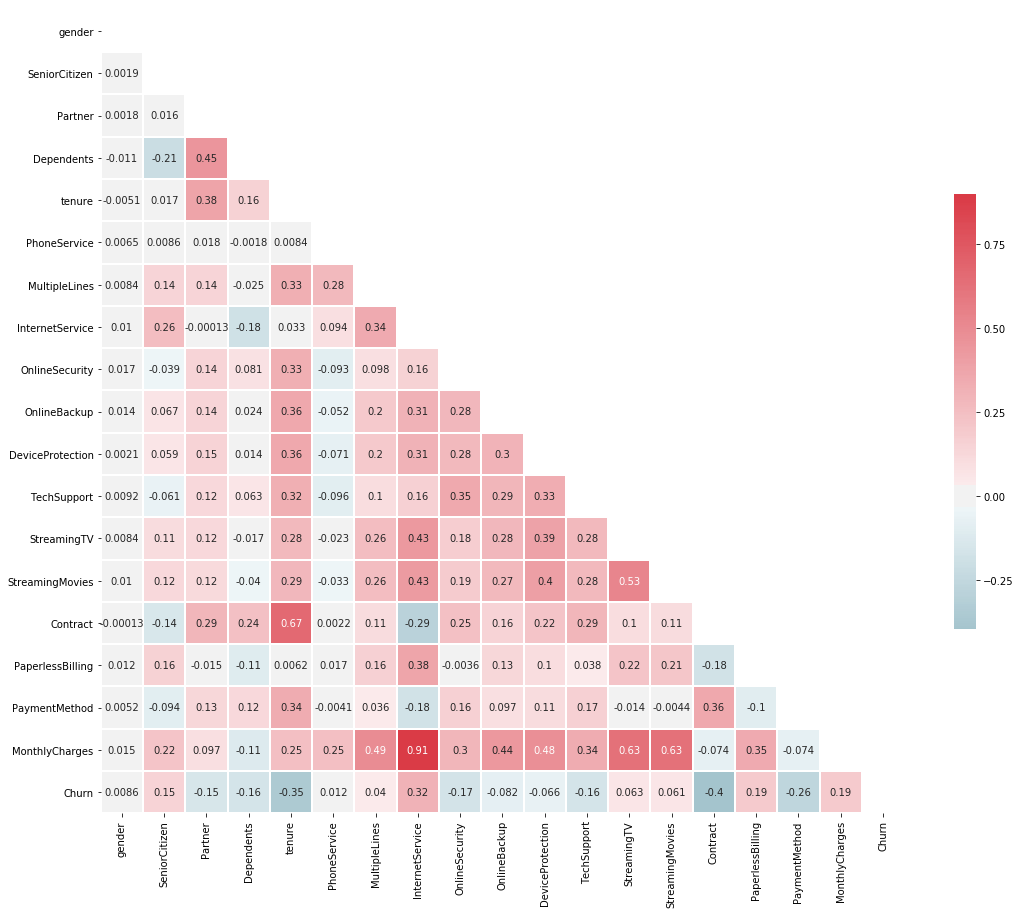

In [126]:
# Compute the correlation matrix
corr = data2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=1, annot = True, cbar_kws={"shrink": .5})

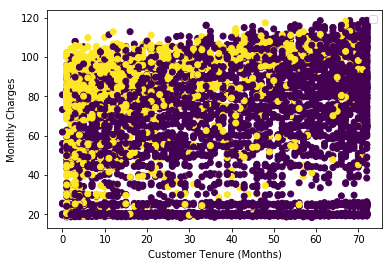

In [127]:
from matplotlib import pyplot as plt
plt.scatter(
    data2['tenure'], 
    data2['MonthlyCharges'], c=y)
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.legend("MonthlyCharges", "tenure")

In [128]:
# create variable for selected columns.
featured_cols = data2[['SeniorCitizen','tenure', 'InternetService', 'StreamingTV', 'Contract', 'PaperlessBilling']

plt.hist(featured_cols, y)

SyntaxError: invalid syntax (<ipython-input-128-c690bac9ab67>, line 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f2f4af710>,
      dtype=object)

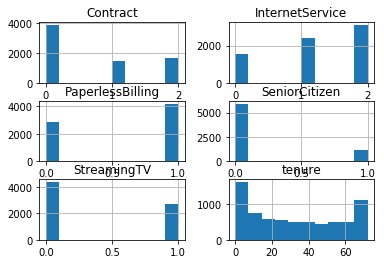

In [131]:
data2[['SeniorCitizen','tenure', 'InternetService', 'StreamingTV', 'Contract', 'PaperlessBilling']].hist()

* What is the accuracy, sensitivity and specificity of the model on the (a) training and (b) test data?

In [151]:

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with the training data
model = logreg.fit(X_train,y_train)
# create y_predict_lr 
y_predict_lr = model.predict(X_test)

In [152]:
confusion_matrix = confusion_matrix(y_test, y_predict_lr )

* create a confusion matrix.

In [155]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_predict_lr ))

Accuracy of logistic regression classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1525
           1       0.67      0.54      0.60       588

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [135]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict_lr)
confusion_matrix

array([[1372,  153],
       [ 273,  315]])

In [ ]:
ax= plt.subplot()
#annot=True to annotate cells, #pass fmt='g' call to keep numbers from going to scientific notation.
sns.heatmap(results, annot=True, ax = ax, fmt='g', cmap='Greens'); #annot=True to annotate cells, #pass fmt='g' call to keep numbers from going to scientific notation.

# labels, title and ticks
ax.set_xlabel('Predicted values');ax.set_ylabel('True values'); 
ax.set_title('Confusion Matrix of Customer Churn'); 
ax.xaxis.set_ticklabels(['No Churn', 'Churn']); ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [150]:

# confusion_matrix = confusion_matrix
print("Confusion Matrix : \n", confusion_matrix)
confusion_matrix
#total1= sum(sum(confusion_matrix))
#####from confusion matrix calculate accuracy
#accuracy1=(confusion_matrix[0,0]+confusion_matrix[1,1])/total1
#print ('Accuracy : ', accuracy1)

# sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
# print('Sensitivity : ', sensitivity1 )

# specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
# print('Specificity : ', specificity1)

Confusion Matrix : 
 <function confusion_matrix at 0x7f9f3ee73158>


TypeError: 'function' object is not iterable

Sensitivity and specificity are statistical measures of the performance of a binary classification test, also known in statistics as a classification function, that are widely used in medicine:

Sensitivity (also called the true positive rate, the recall, or probability of detection[1] in some fields) measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition). Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition). ("https://en.wikipedia.org/wiki/Sensitivity_and_specificity")